# Problem statement

# Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

# Data description


Item_Identifier : Unique product ID

Item_Weight : Weight of product

Item_Fat_Content : Whether the product is low fat or not

Item_Visibility : The % of total display area of all products in a store allocated to the particular product

Item_Type : The category to which the product belongs

Item_MRP : Maximum Retail Price (list price) of the product

Outlet_Identifier : Unique store ID

Outlet_Establishment_Year : The year in which store was established

Outlet_Size : The size of the store in terms of ground area covered

Outlet_Location_Type : The type of city in which the store is located

Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales : Sales of the product in the particular store.

# Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read the datasets

In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

# Data inspection and EDA

In [3]:
train.shape

(8523, 12)

In [4]:
test.shape

(5681, 11)

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# Summary of the dataset

train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
train.describe(include="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDG33,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [8]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [9]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [6]:
train["Item_Fat_Content"] = train["Item_Fat_Content"].str.replace('LF',"Low Fat")
train["Item_Fat_Content"] = train["Item_Fat_Content"].str.replace('low fat',"Low Fat")
train["Item_Fat_Content"] = train["Item_Fat_Content"].str.replace('reg',"Regular")

In [11]:
train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [12]:
train.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [13]:
train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
train["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [15]:
train["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [16]:
train["years_established"] = train["Outlet_Establishment_Year"].apply(lambda x : 2020-x)

In [17]:
train.drop("Outlet_Establishment_Year",axis=1,inplace=True)

In [18]:
train.drop("Item_Identifier",axis=1,inplace=True) 

In [19]:
train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [20]:
train["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [21]:
train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [22]:
# Checking for data types
train.dtypes

Item_Weight             float64
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Item_Outlet_Sales       float64
years_established         int64
dtype: object

In [23]:
# Checking for missing values

train.isnull().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
years_established          0
dtype: int64

In [24]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [25]:
train.isnull().sum()/train.shape[0] *100

Item_Weight             17.165317
Item_Fat_Content         0.000000
Item_Visibility          0.000000
Item_Type                0.000000
Item_MRP                 0.000000
Outlet_Identifier        0.000000
Outlet_Size             28.276428
Outlet_Location_Type     0.000000
Outlet_Type              0.000000
Item_Outlet_Sales        0.000000
years_established        0.000000
dtype: float64

In [26]:
test.isnull().sum()/test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

#### can be observed that Item_Weight and Outlet_Size has 17% and 28% missing values respectively in both train and test data

<AxesSubplot:xlabel='Item_Weight'>

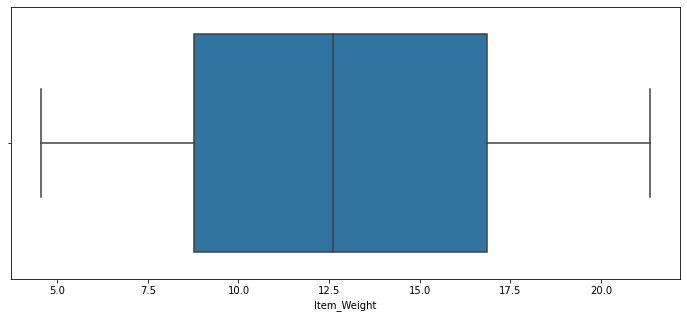

In [27]:
# Checking for outliers for Item_Weight and Outlet_Size columns before IMPUATAIONS

plt.figure(figsize=(12,5))
sns.boxplot(x="Item_Weight",data=train)

#### Since no outliers we can impute with mean

# VISUALIZATION

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


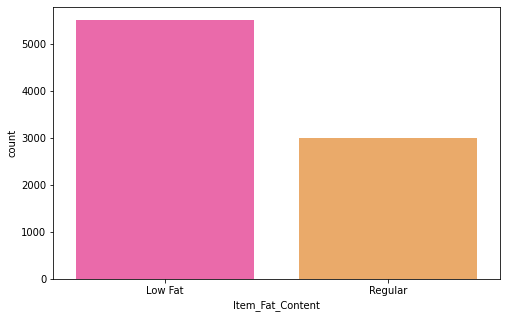

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x="Item_Fat_Content",data=train,palette='spring');

##### INSIGHTS: Low fat products are the most sold

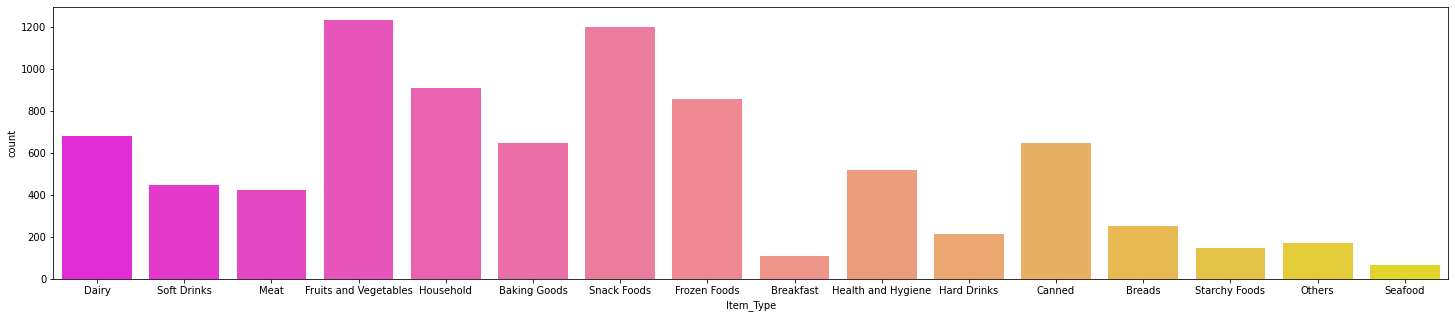

In [17]:
plt.figure(figsize=(25,5))
sns.countplot(x="Item_Type",data=train,palette='spring');

#### INSIGHTS : Fruits and vegetables are the most sold along with snak foods
####                      Sea foods have the lowest sales has they are used rarely

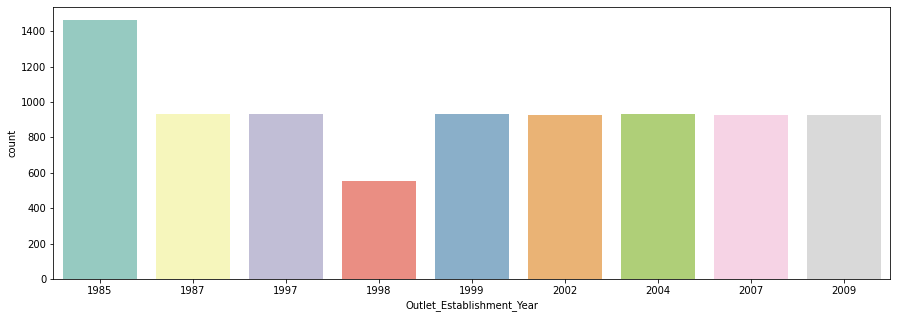

In [21]:
plt.figure(figsize=(15,5))
sns.countplot(x="Outlet_Establishment_Year",data=train,palette='Set3');

#### INSIGHTS : Most stores were established in 1985 and from the 1999 to 2009 almost same number of stores are established and in 1998 stores established were minimum

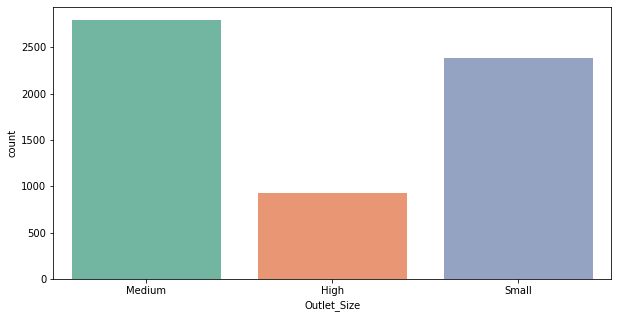

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outlet_Size",data=train,palette="Set2");

#### INSIGHTS : Outlet size are more of Medium sized and are less of High sized outlets

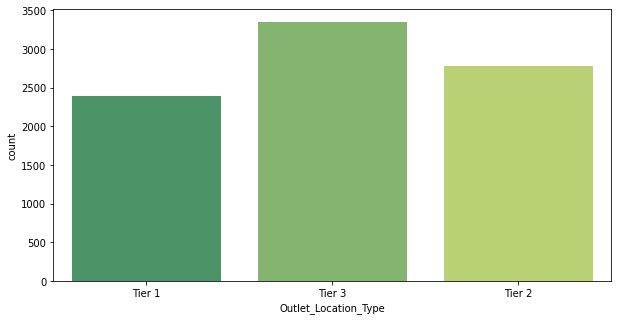

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outlet_Location_Type",data=train,palette="summer");

#### INSIGHTS : Tier 3 loactions has the maximum outlets

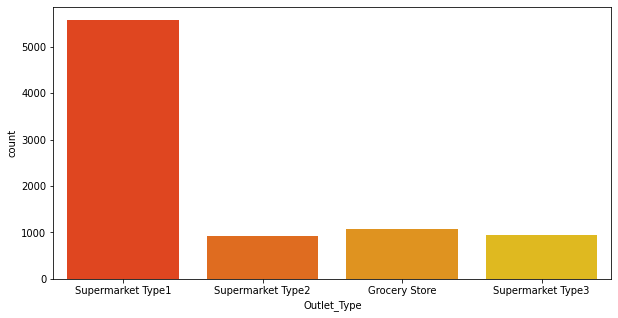

In [35]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outlet_Type",data=train,palette="autumn");

#### INSIGHTS : Supermarket type 1 outlets are the mos common outlets

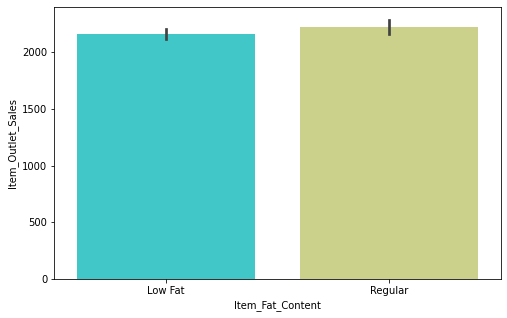

In [51]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=train,palette='rainbow');

#### INSIGHTS : both low fat and regular has almost same sales

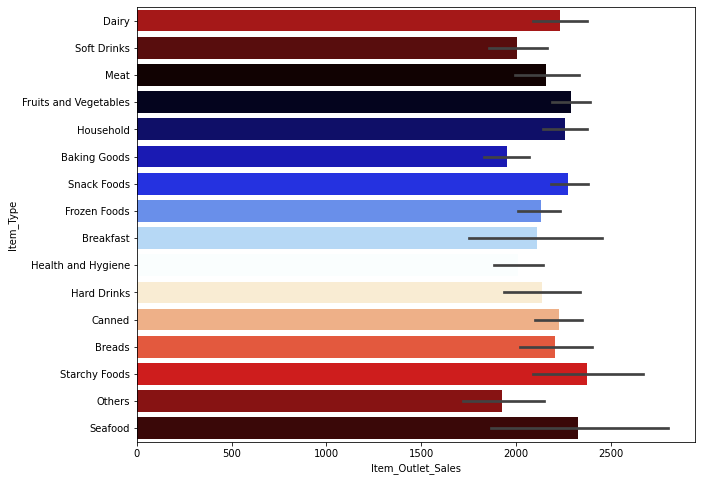

In [50]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='flag');

#### INSIGHTS : The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers

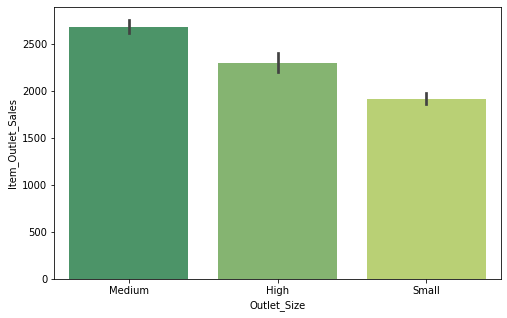

In [49]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train,palette='summer');

#### INSIGHTS : The Outlet Sales is maximum for Medium and High sized Outlets.
#### The Outlets we have is Medium and may be with High size Outlets can improve the Outlet Sales.

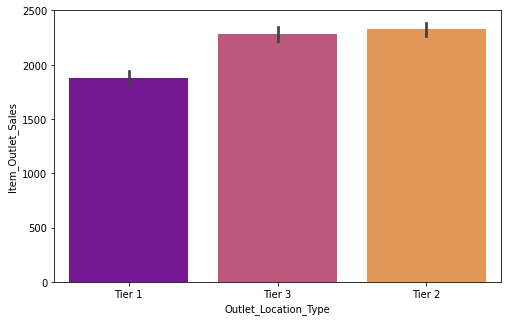

In [48]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,palette='plasma');

#### INSIGHTS : High sales in Tier 2 and Tier 3 outlets

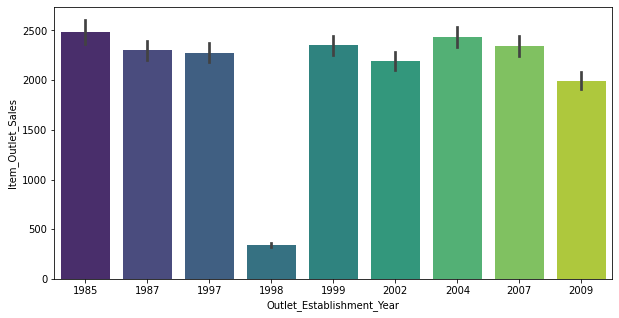

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=train,palette='viridis');

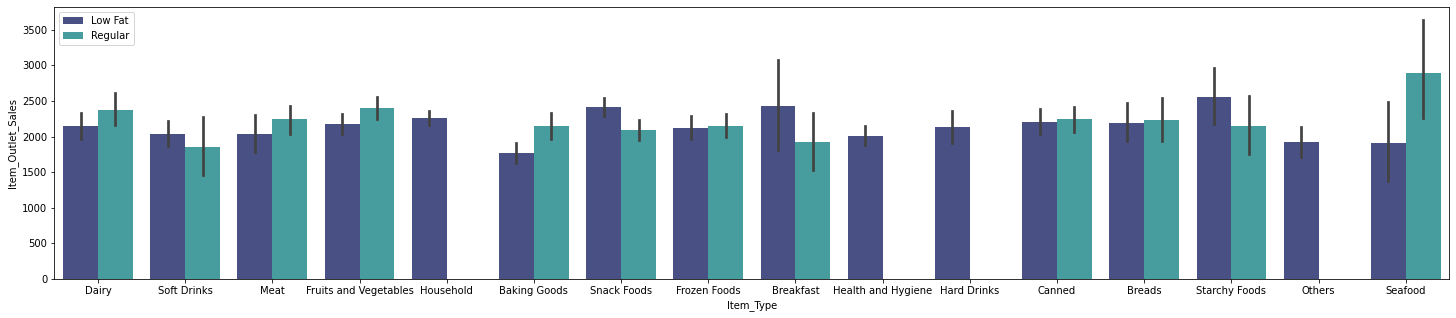

In [52]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.legend();

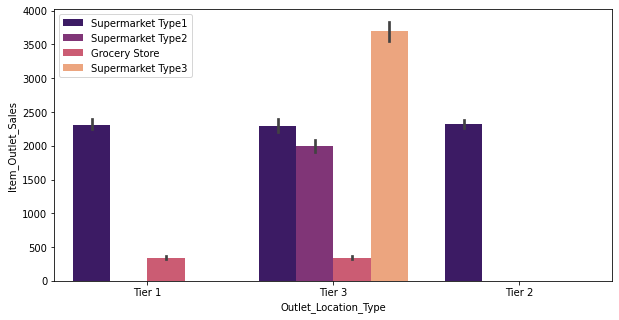

In [53]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend();

#### INSIGHTS : The Tier-3 location type has all types of Outlet type and has high sales margin.


# Train-Test spilt

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X= train.drop("Item_Outlet_Sales",axis=1)
y= train['Item_Outlet_Sales']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5966, 10)
(2557, 10)
(5966,)
(2557,)


In [35]:
# Checking for missing values in train and test dataset

X_train.isnull().sum()

Item_Weight             1028
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             1663
Outlet_Location_Type       0
Outlet_Type                0
years_established          0
dtype: int64

In [36]:
X_test.isnull().sum()

Item_Weight             435
Item_Fat_Content          0
Item_Visibility           0
Item_Type                 0
Item_MRP                  0
Outlet_Identifier         0
Outlet_Size             747
Outlet_Location_Type      0
Outlet_Type               0
years_established         0
dtype: int64

In [37]:
# Nummerical attributes
num_attr=X_train.select_dtypes(['int64','float64']).columns
num_attr

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'years_established'], dtype='object')

In [38]:
# Categorical attributes
cat_attr = X_train.select_dtypes(["object"]).columns
cat_attr

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [39]:
# Imputing missing values with mean

from sklearn.impute import SimpleImputer

In [40]:
imputer_num = SimpleImputer(strategy='mean')

In [41]:
imputer_num.fit(X_train[num_attr])

SimpleImputer()

In [42]:
X_train[num_attr] = imputer_num.transform(X_train[num_attr])
X_test[num_attr] = imputer_num.transform(X_test[num_attr])

In [43]:
imputer_cat = SimpleImputer(strategy="most_frequent")

In [44]:
imputer_cat.fit(X_train[cat_attr])

SimpleImputer(strategy='most_frequent')

In [45]:
X_train[cat_attr] = imputer_cat.transform(X_train[cat_attr])
X_test[cat_attr] = imputer_cat.transform(X_test[cat_attr])

In [46]:
X_train.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
years_established       0
dtype: int64

In [47]:
X_test.isnull().sum()

Item_Weight             0
Item_Fat_Content        0
Item_Visibility         0
Item_Type               0
Item_MRP                0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
years_established       0
dtype: int64

In [48]:
# Dummifications

X_train = pd.get_dummies(columns=cat_attr,data=X_train,drop_first=True)
X_test = pd.get_dummies(columns=cat_attr,data=X_test,drop_first=True)

In [49]:
X_test.shape

(2557, 36)

In [50]:
X_train.shape

(5966, 36)

In [52]:
# Standardize the data(numerical attributes only)

from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
scaler.fit(X_train[num_attr])

StandardScaler()

In [56]:
scaler.mean_

array([1.28821831e+01, 6.62747988e-02, 1.42099863e+02, 2.22076768e+01])

In [55]:
X_train[num_attr]=scaler.transform(X_train[num_attr])
X_test[num_attr]=scaler.transform(X_test[num_attr])

# MODEL BUILDING _ LINEAR REGRESSION

In [51]:
from sklearn.linear_model import LinearRegression

In [57]:
lin_reg = LinearRegression()

In [58]:
lin_reg.fit(X_train,y_train)

LinearRegression()

In [59]:
train_prediction = lin_reg.predict(X_train)
test_prediction = lin_reg.predict(X_test)

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
train_rmse = np.sqrt(mean_squared_error(y_train,train_prediction))
test_rmse = np.sqrt(mean_squared_error(y_test,test_prediction))

In [62]:
print("train_rmse :",round(train_rmse,2))
print("test_rmse :",round(test_rmse,2))

train_rmse : 1148.46
test_rmse : 1077.61


# MODEL BUILDING _ DECISION TREE

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
DT = DecisionTreeRegressor()

In [65]:
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [66]:
train_prediction_dt = DT.predict(X_train)
test_prediction_dt = DT.predict(X_test)

In [67]:
train_rmse_dt = np.sqrt(mean_squared_error(y_train,train_prediction_dt))
test_rmse_dt = np.sqrt(mean_squared_error(y_test,test_prediction_dt))

In [69]:
print("train_rmse_dt :",round(train_rmse_dt,2))
print("test_rmse_dt :",round(test_rmse_dt,2))

train_rmse_dt : 0.0
test_rmse_dt : 1448.7


In [70]:
# DECISION TREE WITH HYPER-PARAMETERS TUNNING

from sklearn.model_selection import GridSearchCV

dt_param_grid = {'criterion': ['mse'],
                 'max_depth': [6,8,10,12], 
                 "min_samples_split": [2, 10, 20],
                 "min_samples_leaf": [1, 5, 10]}

dt_grid = GridSearchCV(DT, param_grid=dt_param_grid, cv=5)

dt_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse'], 'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20]})

In [71]:
dt_grid.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 20}

In [72]:
dt_grid.best_estimator_

DecisionTreeRegressor(max_depth=6, min_samples_leaf=10, min_samples_split=20)

In [73]:
train_pred = dt_grid.predict(X_train)
test_pred = dt_grid.predict(X_test)

In [74]:
train_rmse_dtHP = np.sqrt(mean_squared_error(y_train,train_pred))
test_rmse_dtHP = np.sqrt(mean_squared_error(y_test,test_pred))

In [75]:
print("train_rmse_dtHP :",round(train_rmse_dtHP,2))
print("test_rmse_dtHP :",round(test_rmse_dtHP,2))

train_rmse_dtHP : 1068.94
test_rmse_dtHP : 1051.92


# MODEL BUILDING - RANDOM FOREST

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [99]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

In [100]:
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22)

In [101]:
train_prediction_rf = RF.predict(X_train)
test_prediction_rf = RF.predict(X_test)

In [102]:
train_rmse_rf = np.sqrt(mean_squared_error(y_train,train_prediction_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test,test_prediction_rf))

In [103]:
print("train_rmse_rf :",round(train_rmse_rf,2))
print("test_rmse_rf :",round(test_rmse_rf,2))

train_rmse_rf : 1099.44
test_rmse_rf : 1033.91


In [104]:
RF.feature_importances_

array([9.55524907e-05, 2.21148376e-03, 5.55381823e-01, 4.42394608e-02,
       3.13153282e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.19733247e-02, 6.96016599e-03,
       8.38663750e-02, 0.00000000e+00, 1.90008076e-05, 0.00000000e+00,
       0.00000000e+00, 7.22214108e-05, 2.69140301e-05, 3.21122396e-05,
       2.04141626e-07, 1.60615893e-01, 2.56196114e-02, 8.88545418e-02])

In [105]:
coef = pd.Series(RF.feature_importances_, X_train.columns).sort_values(ascending=False).head()
coef

Item_MRP                         0.555382
Outlet_Type_Supermarket Type1    0.160616
Outlet_Type_Supermarket Type3    0.088855
Outlet_Identifier_OUT027         0.083866
years_established                0.044239
dtype: float64

<AxesSubplot:>

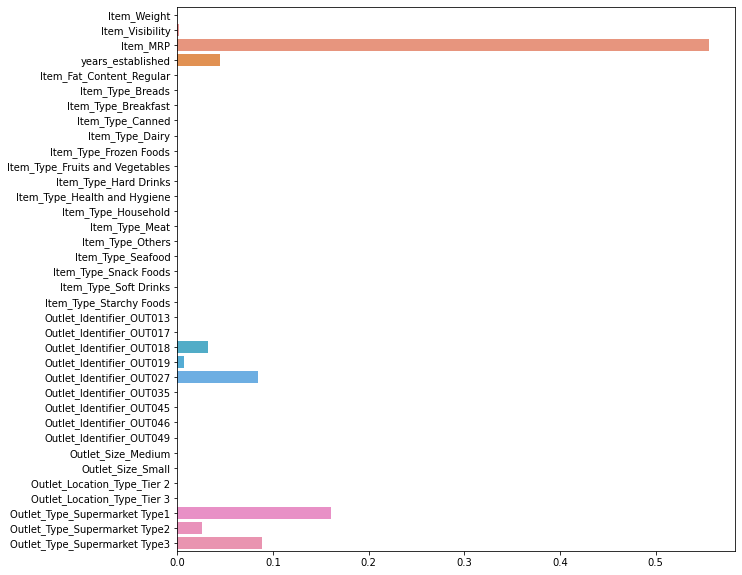

In [106]:
plt.figure(figsize=(10,10))
sns.barplot(RF.feature_importances_,X_train.columns)